# Bài thi: Phân tích, dự báo giá nhà

## Import thư viên

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import time
import pickle

import warnings
warnings.filterwarnings('ignore')

## Đọc dữ liệu

In [2]:
data = pd.read_excel('House_data.xlsx')
print(data.shape)
data.head()

(4386, 19)


,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
0,149065,Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...,"Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn","3,7 tỷ 35,4 triệu/m²",4,3,Đ.Bắc,20.71,5.00,Sổ hồng,1 trệt + 1 lầu,104.5,134.7,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",Đường ấp Thới Tây 2,Xã Tân Hiệp,Huyện Hóc Môn
1,231326,Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...,"Đường Hậu Giang, Phường 11, Quận 6","3,9 tỷ 92,2 triệu/m²",1,--,Tây,12.90,3.00,Sổ hồng,1 trệt,42.3,87.7,6.1,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Di ...",Đường Hậu Giang,Phường 11,Quận 6
2,184984,Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...,"Đường Nguyễn Thượng Hiền, Phường 1, Quận Gò Vấp",2 tỷ 99 triệu/m²,2,--,T.Nam,3.20,4.65,Sổ hồng,"1 trệt, 1 lửng",20.2,150.0,3.0,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Gầ...",Đường Nguyễn Thượng Hiền,Phường 1,Quận Gò Vấp
3,205270,"Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...","Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè","3,8 tỷ 52,9 triệu/m²",2,2,Đ.Bắc,14.35,5.00,Sổ hồng,1 trệt + 1 lầu,71.8,137.6,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên...",Đường Huỳnh Tấn Phát,Xã Phú Xuân,Huyện Nhà Bè
4,307136,"Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...","Đường Lò Siêu, Phường 16, Quận 11","6,5 tỷ 124,8 triệu/m²",5,5,T.Nam,10.00,5.20,Sổ hồng,"1 trệt, 1 lửng, 1 tầng thượng + 2 lầu",52.1,70.3,0.0,5.0,NaN,Đường Lò Siêu,Phường 16,Quận 11


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4386 non-null   int64  
 1   Noi_dung           4386 non-null   object 
 2   Dia_chi            4386 non-null   object 
 3   Gia                4386 non-null   object 
 4   Nha_ve_sinh        4386 non-null   object 
 5   So_phong           4386 non-null   object 
 6   Huong              4386 non-null   object 
 7   Chieu_dai          4386 non-null   float64
 8   Rong               4386 non-null   float64
 9   Giay_to            4386 non-null   object 
 10  Cau_truc           4386 non-null   object 
 11  Dien_tich          4386 non-null   float64
 12  Dien_tich_su_dung  4386 non-null   float64
 13  Hem_rong           4386 non-null   float64
 14  Duong_mat_tien     4386 non-null   float64
 15  Tien_ich           3551 non-null   object 
 16  Duong              4386 

In [4]:
data.describe()

,ID,Chieu_dai,Rong,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien
count,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000,4386.000000
mean,263633.217510,14.452971,4.679051,70.052143,138.968689,3.112607,2.996762
std,95389.896681,6.956114,2.225326,72.502910,113.643645,2.493850,6.376593
min,17258.000000,1.000000,0.750000,4.700000,1.469000,0.000000,0.000000
25%,185023.750000,10.000000,3.550000,36.500000,68.900000,1.600000,0.000000
50%,295879.500000,13.500000,4.000000,55.100000,111.750000,3.000000,0.000000
75%,348200.500000,18.000000,5.000000,80.100000,177.000000,4.500000,0.000000
max,369574.000000,101.460000,30.340000,1699.400000,1722.100000,32.000000,60.000000


## Data Pre_processing

In [5]:
# Ta ko sử dụng các cột 'ID', 'Noi_dung','Dia_chi'
data = data.drop(['ID', 'Noi_dung','Dia_chi'], axis =1)
data.head()

,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
0,"3,7 tỷ 35,4 triệu/m²",4,3,Đ.Bắc,20.71,5.00,Sổ hồng,1 trệt + 1 lầu,104.5,134.7,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",Đường ấp Thới Tây 2,Xã Tân Hiệp,Huyện Hóc Môn
1,"3,9 tỷ 92,2 triệu/m²",1,--,Tây,12.90,3.00,Sổ hồng,1 trệt,42.3,87.7,6.1,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Di ...",Đường Hậu Giang,Phường 11,Quận 6
2,2 tỷ 99 triệu/m²,2,--,T.Nam,3.20,4.65,Sổ hồng,"1 trệt, 1 lửng",20.2,150.0,3.0,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Gầ...",Đường Nguyễn Thượng Hiền,Phường 1,Quận Gò Vấp
3,"3,8 tỷ 52,9 triệu/m²",2,2,Đ.Bắc,14.35,5.00,Sổ hồng,1 trệt + 1 lầu,71.8,137.6,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên...",Đường Huỳnh Tấn Phát,Xã Phú Xuân,Huyện Nhà Bè
4,"6,5 tỷ 124,8 triệu/m²",5,5,T.Nam,10.00,5.20,Sổ hồng,"1 trệt, 1 lửng, 1 tầng thượng + 2 lầu",52.1,70.3,0.0,5.0,NaN,Đường Lò Siêu,Phường 16,Quận 11


In [6]:
# Chuyển cột giá thành int (triệu đồng)
numb = []
Gia = data['Gia']
for i in range(len(data['Gia'])):
    if Gia[i].split(' ')[1]=='tỷ':
        num = float(Gia[i].split(' ')[0].replace(',','.'))*1000
    elif Gia[i].split(' ')[1]=='triệu':
        num = float(Gia[i].split(' ')[0].replace(',','.'))
    elif Gia[i].split(' ')[0] == 'Đã':
        num = float(Gia[i].split(' ')[2].replace(',','.'))*data['Dien_tich'][i]
    numb.append(num)

In [7]:
data['Gia'] = numb
data['Gia'].describe()

count      4386.000000
mean       8490.783917
std        8090.699203
min           9.000000
25%        4000.000000
50%        6200.000000
75%        9800.000000
max      125000.000000
Name: Gia, dtype: float64

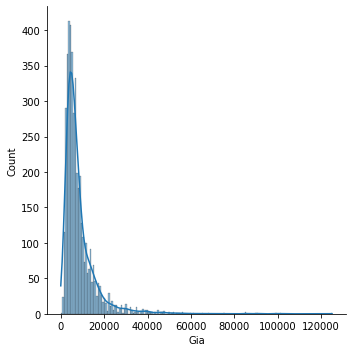

In [8]:
sns.displot(data['Gia'],kde=True)

<AxesSubplot:>

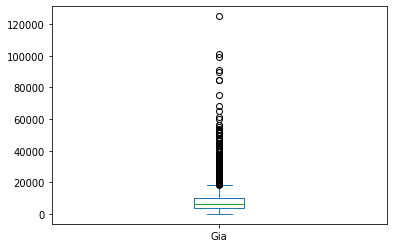

In [9]:
data['Gia'].plot(kind='box')

Nhận xét: Các giá trị outlier là hợp lý, phù hợp với giá cả thực tế đối với các BĐS lớn, ở những nơi có giá trị.

Thực tế, biến Nha_ve_sinh < biến So_phong. Ta thấy rất nhiều số liệu của Nha_ve_sinh không hợp lý nên ta bỏ biến này. <br>
Các missing value của So_phong được lấy từ biến Nha_ve_sinh

In [10]:
for i in range(len(data['So_phong'])):
    if type(data['So_phong'][i]) == str and type(data['Nha_ve_sinh'][i]) == int:
        data['So_phong'][i] = data['Nha_ve_sinh'][i]
    elif type(data['So_phong'][i]) == str and type(data['Nha_ve_sinh'][i]) == str:
        data['So_phong'][i] = data['So_phong'].mode()[0]

In [11]:
data = data.drop('Nha_ve_sinh',axis=1)
data['So_phong'] = data['So_phong'].astype(int)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gia                4386 non-null   float64
 1   So_phong           4386 non-null   int64  
 2   Huong              4386 non-null   object 
 3   Chieu_dai          4386 non-null   float64
 4   Rong               4386 non-null   float64
 5   Giay_to            4386 non-null   object 
 6   Cau_truc           4386 non-null   object 
 7   Dien_tich          4386 non-null   float64
 8   Dien_tich_su_dung  4386 non-null   float64
 9   Hem_rong           4386 non-null   float64
 10  Duong_mat_tien     4386 non-null   float64
 11  Tien_ich           3551 non-null   object 
 12  Duong              4386 non-null   object 
 13  Phuong             4386 non-null   object 
 14  Quan               4386 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 514.1+ KB


In [13]:
data.Huong.value_counts()

T.Bắc             817
Đ.Nam             780
Đ.Bắc             711
T.Nam             707
Nam               360
Đông              353
Bắc               324
Tây               296
Không xác định     38
Name: Huong, dtype: int64

In [14]:
data['Huong'][data['Huong']=='Không xác định']= data['Huong'].mode()[0]

In [15]:
label_Huong = LabelEncoder()
data['Huong'] = label_Huong.fit_transform(data['Huong'])

In [16]:
data['Giay_to'].value_counts()

Sổ hồng                        4305
Sổ đỏ                            61
Khác                             12
Giấy chứng nhận phường quận       8
Name: Giay_to, dtype: int64

In [17]:
label_Giayto = LabelEncoder()
data['Giay_to'] = label_Giayto.fit_transform(data['Giay_to'])

In [18]:
# Biến 'Cau_truc' phan tich kha phuc tap, lai co su tuong quan voi 
# bien 'Dien_tich_su_dung'. Ta tạm thời không sử dụng biến này
data = data.drop('Cau_truc',axis=1)

In [19]:
# Biến 'Dien_tich' và 'Dien_tich_su_dung' có một số giá trị bị lỗi 
# chính tả ở dấu phần trăm. Ta sửa trực tiếp trên file xlxs
# Biến 'Tien_ich' phân tích khá phức tạp, ta tạm thời không sử dụng biến này
# Biến 'Duong' quá nhiều giá trị, ta không sử dụng biến này.
# Ở nhiều quận sẽ có trùng tên phường. Do đó biến 'Phuong' cần được kết hợp với biến 'Quan'
data['Phuong'] = data['Phuong']  + ','+ data['Quan'] 

In [20]:
data['Phuong'].value_counts()

 Phường 15, Quận 8                       85
 Thị trấn Nhà Bè, Huyện Nhà Bè           71
 Phường Hiệp Bình Chánh, Quận Thủ Đức    71
 Phường 14, Quận Gò Vấp                  50
 Phường 16, Quận 8                       47
                                         ..
 Phường Long Phước, Quận 9                1
 Xã Vĩnh Lộc A, Huyện Bình Chánh          1
 Phường 5, Quận 4                         1
 Phường 10, Quận 5                        1
 Xã Phạm Văn Hai, Huyện Bình Chánh        1
Name: Phuong, Length: 287, dtype: int64

In [21]:
# Biến 'Phuong[] cũng có quá nhiều giá trị, ta tạm thời không sử dụng biến này.
# Biến đổi biến 'Quan'
data = data.drop(['Tien_ich','Duong','Phuong'],axis=1)

In [22]:
Quan_1hot = pd.get_dummies(data['Quan'], prefix='')
Quan_1hot.head()

,_ Huyện Bình Chánh,_ Huyện Hóc Môn,_ Huyện Nhà Bè,_ Quận 1,_ Quận 10,_ Quận 11,_ Quận 12,_ Quận 2,_ Quận 3,_ Quận 4,...,_ Quận 7,_ Quận 8,_ Quận 9,_ Quận Bình Thạnh,_ Quận Bình Tân,_ Quận Gò Vấp,_ Quận Phú Nhuận,_ Quận Thủ Đức,_ Quận Tân Bình,_ Quận Tân Phú
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = pd.concat([data, Quan_1hot], axis=1)
data = data.drop(['Quan','_ Quận Tân Phú'], axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gia                 4386 non-null   float64
 1   So_phong            4386 non-null   int64  
 2   Huong               4386 non-null   int64  
 3   Chieu_dai           4386 non-null   float64
 4   Rong                4386 non-null   float64
 5   Giay_to             4386 non-null   int64  
 6   Dien_tich           4386 non-null   float64
 7   Dien_tich_su_dung   4386 non-null   float64
 8   Hem_rong            4386 non-null   float64
 9   Duong_mat_tien      4386 non-null   float64
 10  _ Huyện Bình Chánh  4386 non-null   uint8  
 11  _ Huyện Hóc Môn     4386 non-null   uint8  
 12  _ Huyện Nhà Bè      4386 non-null   uint8  
 13  _ Quận 1            4386 non-null   uint8  
 14  _ Quận 10           4386 non-null   uint8  
 15  _ Quận 11           4386 non-null   uint8  
 16  _ Quận

## Chuẩn bị dữ liệu cho mô hình Regression

In [25]:
X_train = data.drop('Gia',axis=1)

In [26]:
y_train_re = data[['Gia']]

In [27]:
name_columns = X_train.columns

In [28]:
scaler_X= MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)

In [29]:
scaler_y = MinMaxScaler()
y_train_re = scaler_y.fit_transform(y_train_re)

## Xây dựng mô hình Regression

In [30]:
# Liệt kê các model sử dụng
models = [SVR(), LinearRegression(),KNeighborsRegressor(n_neighbors=11),DecisionTreeRegressor(max_depth=9),RandomForestRegressor()]
scores = []
train_times = []
names = []

# Duyệt qua các models
# * Thực hiện cross val score với mỗi model (cv=10)
# * Thêm số liệu cho score, train_times và names
# Tạo dataframe gồm 3 cột trên
for model in models:
    start = time.time()
    scores.append(cross_val_score(model,X_train, y_train_re,cv=10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df = pd.DataFrame(scores, columns = ['Score'], index = range(len(models)))
df.insert(1,'Time',pd.Series(train_times))
df.insert(0,'Model',pd.Series(names))
df.head(10)

,Model,Score,Time
0,SVR,0.298020,0.540068
1,LinearRegression,0.606274,0.053326
2,KNeighborsRegressor,0.431630,0.345641
3,DecisionTreeRegressor,0.329688,0.169800
4,RandomForestRegressor,0.612774,21.085889


Nhận xét: Kết quả các mô hình cơ bản khá thấp, ta thử với ADABoost và XGBoost với mô hình cơ bản là LinearRegression

In [314]:
# Dùng ADA Boost - LinearRegression
ml = LinearRegression()
clf = AdaBoostRegressor(n_estimators=50,
                         base_estimator=ml,
                         learning_rate=1)

In [315]:
# Train model
model = clf.fit(X_train,y_train_re)
score = cross_val_score(model,X_train, y_train_re,cv=10).mean()
score

0.4322499594586044

Nhận xét: Kết quả mô hình ADABoost sử dụng mô hình cơ bản là LinearRegression thậm chí còn thấp hơn khi chỉ sử dụng mô hình cơ bản LinearRegression. Ta thử mô hình ADABoost sử dụng mô hình cơ bản là RandomForestRegressor

In [316]:
# Dùng ADA Boost - RandomForestRegressor
ml = RandomForestRegressor()
clf = AdaBoostRegressor(n_estimators=50,
                        base_estimator=ml,
                        learning_rate=1)

In [317]:
# Train model
model = clf.fit(X_train,y_train_re)
score = cross_val_score(model,X_train, y_train_re,cv=10).mean()
score

0.6218166201151191

Nhận xét: score của ADABoost sử dụng RandomForestRegressor đạt kết quả cao nhất so với các mô hình đã xét. Tuy nhiên vẫn còn rất thấp

In [ ]:
# Sử dụng XGBoost
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train,y_train_re)
scores = cross_val_score(xgb_model,X_train,y_train_re,sv=5)
scores
# Kernel died khi chạy XGBoost?

Kết quả các mô hình đã xét rất thấp. Ta thử chuyển bài toán từ bài toán hồi quy sang bài toán phân loại bằng cách chia khoảng cho biến 'Gia'.

## Chuẩn bị dữ liệu cho mô hình Classification

In [31]:
bins = [-np.inf,2000,4000,8000,12000,20000,50000,+np.inf]
labels = ['Very low', 'Low', 'Medium', 'High', 'Quite high','Very high','Extra high']
data['Gia_cat'] = pd.cut(data['Gia'], bins, labels = labels)
data['Gia_cat'].head()

y_train_cl = data['Gia_cat']

## Xây dựng mô hình Classification

In [32]:
# Liệt kê các model sử dụng
models = [SVC(),MultinomialNB() ,LogisticRegression(),KNeighborsClassifier(n_neighbors=11),DecisionTreeClassifier(max_depth=9),RandomForestClassifier()]
scores = []
train_times = []
names = []

# Duyệt qua các models
# * Thực hiện cross val score với mỗi model (cv=10)
# * Thêm số liệu cho score, train_times và names
# Tạo dataframe gồm 3 cột trên
for model in models:
    start = time.time()
    scores.append(cross_val_score(model,X_train, y_train_cl,cv=10).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

df = pd.DataFrame(scores, columns = ['Score'], index = range(len(models)))
df.insert(1,'Time',pd.Series(train_times))
df.insert(0,'Model',pd.Series(names))
df.head(10)

,Model,Score,Time
0,SVC,0.541269,11.400979
1,MultinomialNB,0.429317,0.122341
2,LogisticRegression,0.556766,2.219576
3,KNeighborsClassifier,0.505020,0.557363
4,DecisionTreeClassifier,0.536484,0.253628
5,RandomForestClassifier,0.626308,6.768147


Ta thấy rằng hầu hết score các mô hình đều tăng, nhưng không đáng kể. Trừ mô hình Logistic là giảm so với Linear. 

In [33]:
# Ta thử dùng ADABoost kết hợp với LogisticRegression
ml = LogisticRegression()
clf = AdaBoostClassifier(n_estimators=50,
                         base_estimator=ml,
                         learning_rate=1)

In [34]:
model_adcl = clf.fit(X_train,y_train_cl)
score_adcl = cross_val_score(model,X_train, y_train_cl,cv=10).mean()
score_adcl

0.6235679886832881

In [35]:
# Ta thử dùng ADABoost kết hợp với RandomForestClassifier
ml = RandomForestClassifier()
clf = AdaBoostClassifier(n_estimators=50,
                         base_estimator=ml,
                         learning_rate=1)

In [36]:
model_adcl = clf.fit(X_train,y_train_cl)
score_adcl = cross_val_score(model,X_train, y_train_cl,cv=10).mean()
score_adcl

0.6196960713951385

Kết quả mô hình Classification cũng không cao hơn đáng kể so với mô hình Regression.

Ta thử chọn lựa các biến quan trọng để xem kết quả mô hình có cải thiện?

In [37]:
# Hiện tại ta có 30 biến input. Ta kiểm tra lại mức độ liên quan giữa các biến ở X
corr_matrix = data.corr()
corr_matrix["Gia"].sort_values(ascending=False)

Gia                   1.000000
Dien_tich             0.563525
Dien_tich_su_dung     0.544276
Chieu_dai             0.501736
So_phong              0.455142
Rong                  0.409133
Duong_mat_tien        0.354894
_ Quận 3              0.115121
_ Quận 1              0.099226
_ Quận 10             0.091051
_ Quận 2              0.090422
_ Quận 6              0.066473
_ Quận Phú Nhuận      0.060892
_ Quận 5              0.045192
_ Quận Tân Bình       0.041435
_ Quận 11             0.029750
Giay_to               0.026014
_ Quận 7              0.012375
_ Quận Bình Thạnh     0.010541
_ Quận 9              0.008869
_ Quận Thủ Đức        0.001509
Huong                -0.002128
_ Huyện Bình Chánh   -0.022857
_ Quận 4             -0.049109
_ Huyện Hóc Môn      -0.058369
_ Quận Bình Tân      -0.060305
_ Quận Gò Vấp        -0.069378
_ Quận 12            -0.089424
_ Huyện Nhà Bè       -0.100029
_ Quận 8             -0.137267
Hem_rong             -0.146732
Name: Gia, dtype: float64

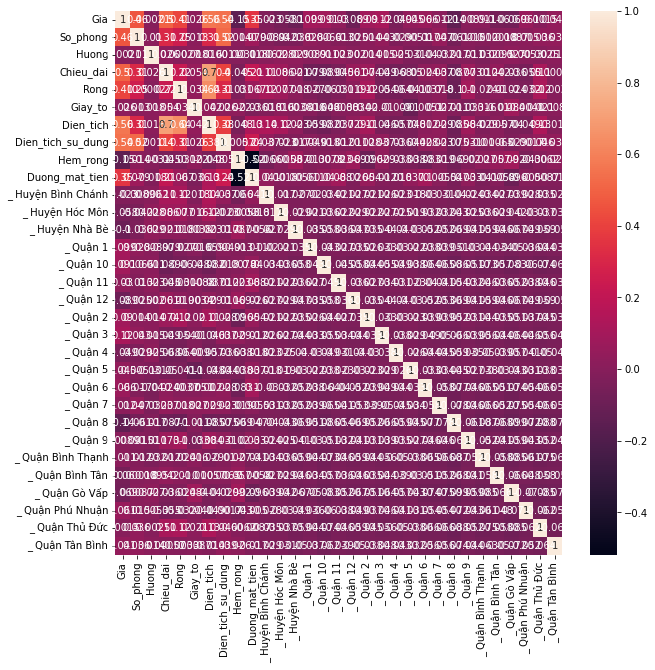

In [38]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [39]:
# Tìm thuộc tính quan trọng
model = RandomForestRegressor()
model.fit(X_train,y_train_re)
imp_features = pd.Series(model.feature_importances_,index=name_columns).sort_values(ascending=False)
imp_features

Dien_tich             0.329743
Dien_tich_su_dung     0.235062
So_phong              0.073566
Duong_mat_tien        0.070460
Rong                  0.046026
Chieu_dai             0.043627
Hem_rong              0.028398
_ Quận 10             0.025723
_ Quận 1              0.022148
Huong                 0.020765
_ Quận 3              0.018460
_ Quận Phú Nhuận      0.014620
_ Quận 5              0.012704
_ Quận 2              0.008338
_ Quận 6              0.006602
_ Quận Tân Bình       0.006074
_ Quận Bình Thạnh     0.006024
_ Quận 11             0.004483
_ Huyện Nhà Bè        0.003655
_ Quận 7              0.003638
_ Huyện Bình Chánh    0.002873
_ Quận 4              0.002646
_ Quận Thủ Đức        0.002518
_ Huyện Hóc Môn       0.002279
Giay_to               0.002133
_ Quận 12             0.001778
_ Quận Gò Vấp         0.001769
_ Quận 8              0.001731
_ Quận 9              0.001276
_ Quận Bình Tân       0.000880
dtype: float64

In [40]:
# Ta chọn 4 biến quan trọng: 'Dien_tich_su_dung','Dien_tich','So_phong','Duong_mat_tien'
X_train = data[['Dien_tich_su_dung','Dien_tich','So_phong','Duong_mat_tien']]
X_train = scaler_X.fit_transform(X_train)

In [41]:
model = RandomForestRegressor()
model.fit(X_train,y_train_re)
score = cross_val_score(model,X_train, y_train_re,cv=10).mean()
score.mean()

0.48273129299403256

In [42]:
# Ta chọn 7 biến quan trọng
X_train = data[['Dien_tich_su_dung','Dien_tich','So_phong','Duong_mat_tien','Rong','Chieu_dai','Hem_rong']]
X_train = scaler_X.fit_transform(X_train)

In [43]:
model = RandomForestRegressor()
model.fit(X_train,y_train_re)
score = cross_val_score(model,X_train, y_train_re,cv=10).mean()
score.mean()

0.5051476859086347

Chọn biến quan trọng, score mô hình thậm chí còn thấp hơn.

Tạm thời, ta sử dụng mô hình RandomForestClassifier cho bài toán Classification để kiểm tra và dự báo

## Xây dựng pipeline

In [47]:
# Sử dụng hàm tự định nghĩa vào pipeline
from sklearn.base import BaseEstimator, TransformerMixin
class Pre_Process(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('Khởi tạo đối tượng Data Pre_Processing')
    
    def fit(self, X, y=None):
        print('Vào lệnh Fit')
        return self
    
    def transform(self,X,y=None):
        print('Vào lệnh Transform')

        for i in range(len(X['So_phong'])):
            if type(X['So_phong'][i]) == str and type(X['Nha_ve_sinh'][i]) == int:
                X['So_phong'][i] = X['Nha_ve_sinh'][i]
            else:
                X['So_phong'][i] = X['So_phong'].mode()[0] 
             
        X['So_phong'] = X['So_phong'].astype(int)

        X['Huong'][X['Huong']=='Không xác định']= X['Huong'].mode()[0]
        label_Huong = LabelEncoder()
        X['Huong'] = label_Huong.fit_transform(X['Huong'])
        
        label_Giayto = LabelEncoder()
        X['Giay_to'] = label_Giayto.fit_transform(X['Giay_to'])

        Quan_1hot = pd.get_dummies(X['Quan'], prefix='')
        Quan_1hot.head()
        X = pd.concat([X, Quan_1hot], axis=1)
        X = X.drop(['Quan'], axis=1)
        
        X = X.drop(['ID','Noi_dung','Dia_chi','Nha_ve_sinh','Cau_truc','Tien_ich','Duong','Phuong'],axis=1)
        X_new = X.copy()
        
        # Truong hop su dung mo hinh Classification
        if y:
            bins = [-np.inf,2000,4000,8000,12000,20000,50000,+np.inf]
            labels = ['Very low', 'Low', 'Medium', 'High', 'Quite high','Very high','Extra high']
            y = pd.cut(y, bins, labels = labels)
            y_new = y.copy()
            return X_new, y_new
        
        # Cập nhật X_new
        return X_new

In [48]:
# Tạo pipeline
from sklearn.pipeline import Pipeline
model_3steps = Pipeline(steps = [('Data Pre_Processing',Pre_Process()),
                                 ('Scale_data',MinMaxScaler()),
                                 ('RandomForest model', RandomForestClassifier())])

Khởi tạo đối tượng Data Pre_Processing


In [49]:
data = pd.read_excel('House_data.xlsx')
X_train = data.drop('Gia', axis =1)
model_3steps.fit(X_train,y_train_cl)
model_3steps.score(X_train,y_train_cl)

Vào lệnh Fit
Vào lệnh Transform
Vào lệnh Transform


0.9997720018239854

# Lưu mô hình

In [50]:
filename = "gianha_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model_3steps, file)

# Gọi mô hình

In [51]:
with open("gianha_model.pkl", 'rb') as file:
   model = pickle.load(file)

# Dự đoán

In [52]:
X_test = pd.read_excel('House_test.xlsx')
y_test = pd.read_excel('Price_test.xlsx')['Gia (triệu)']
y_pred = model.predict(X_test)

Vào lệnh Transform


# Đánh giá

In [53]:
bins = [-np.inf,2000,4000,8000,12000,20000,50000,+np.inf]
labels = ['Very low', 'Low', 'Medium', 'High', 'Quite high','Very high','Extra high']
y_test = pd.cut(y_test, bins, labels = labels)

In [54]:
# Sử dụng các đại lượng khác đánh giá tập test
score = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
print(score,precision,recall,f1)

0.6392318244170097 0.5265998440827183 0.44965999661801026 0.47799805785123567


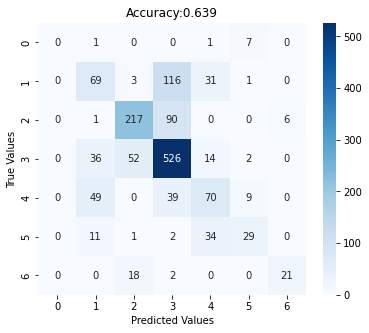

In [55]:
# Vẽ confusion matrix và nhận xét kết quả trên tập test
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,annot=True,fmt='g',cmap='Blues')
plt.title('Accuracy:{0:.3f}'.format(score))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Kết quả train test đều rất thấp. Ta không thể sử dụng mô hình này.